### Data Binning

In [12]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np

In [13]:
# Use geyser dataset from seaborn
geyser = sns.load_dataset('geyser')
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


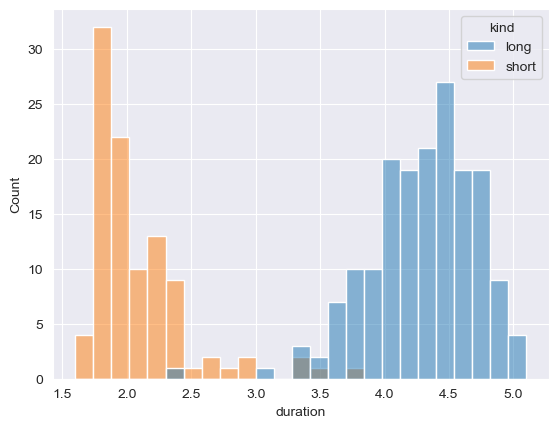

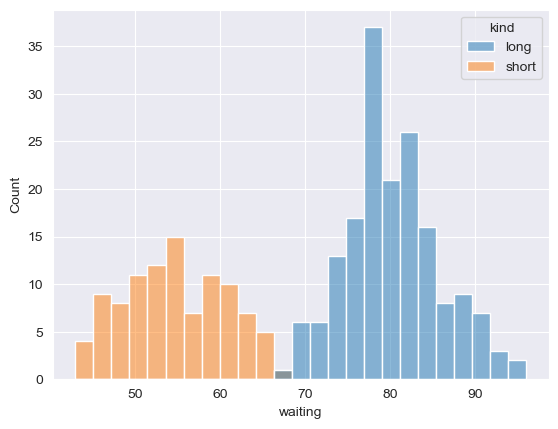

In [14]:
#Plot histograms to show the distribution for duration and waiting
sns.histplot(data=geyser,x="duration",bins=25,hue="kind")
plt.show()
sns.histplot(data=geyser,x="waiting",bins=25,hue="kind")
plt.show()

In [15]:
#use Panda's qcut distribution to distribute the data by quartiles
geyser["qcut_dur_2"] = pd.qcut(geyser.duration,q=2,labels=["short","long"]) #use median for binning
geyser["qcut_dur_3"] = pd.qcut(geyser.duration,q=3,labels=["short","medium","long"]) #use 33% and 66% for binning borders
geyser

,duration,waiting,kind,qcut_dur_2,qcut_dur_3
0,3.600,79,long,short,medium
1,1.800,54,short,short,short
2,3.333,74,long,short,medium
3,2.283,62,short,short,short
4,4.533,85,long,long,long
...,...,...,...,...,...
267,4.117,81,long,long,medium
268,2.150,46,short,short,short
269,4.417,90,long,long,long
270,1.817,46,short,short,short


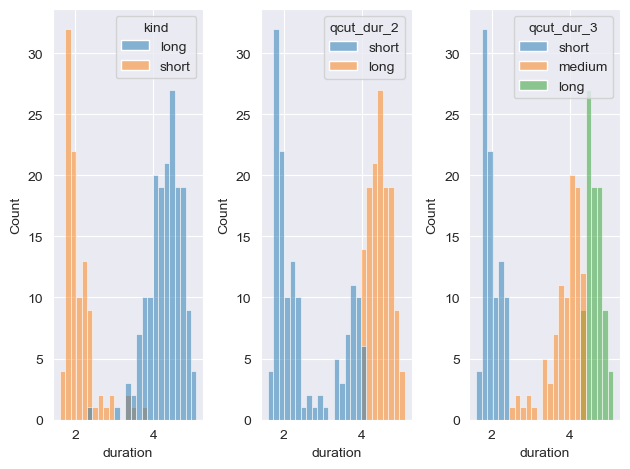

In [16]:
#plot the data using pyplot and seaborn
fig, ((h_dur,qc_dur2,qc_dur3)) = plt.subplots(1,3)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_2",ax=qc_dur2)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_3",ax=qc_dur3)

plt.tight_layout()
plt.show()

In [17]:
#Use panda's cut function to define new/ customised binning/ categories
geyser["cut_2"] = pd.cut(geyser.duration,bins=2,labels=["short","long"])
geyser["cut_3"] = pd.cut(geyser.duration,bins=3,labels=["short","medium","long"])

geyser

,duration,waiting,kind,qcut_dur_2,qcut_dur_3,cut_2,cut_3
0,3.600,79,long,short,medium,long,medium
1,1.800,54,short,short,short,short,short
2,3.333,74,long,short,medium,short,medium
3,2.283,62,short,short,short,short,short
4,4.533,85,long,long,long,long,long
...,...,...,...,...,...,...,...
267,4.117,81,long,long,medium,long,long
268,2.150,46,short,short,short,short,short
269,4.417,90,long,long,long,long,long
270,1.817,46,short,short,short,short,short


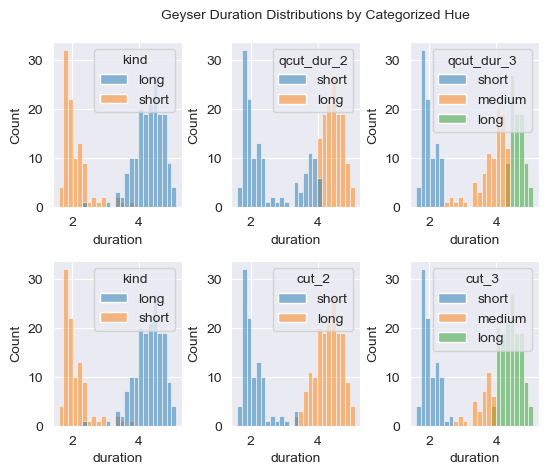

In [18]:
#plot the data using pyplot and seaborn
fig, ((h_dur,qc_dur2,qc_dur3),(h_dur2,c_2,c_3)) = plt.subplots(2,3)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_2",ax=qc_dur2)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_3",ax=qc_dur3)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur2)
sns.histplot(data=geyser,x="duration",bins=25,hue="cut_2",ax=c_2)
sns.histplot(data=geyser,x="duration",bins=25,hue="cut_3",ax=c_3)

#Add figure title
fig.suptitle("Geyser Duration Distributions by Categorized Hue", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()

In [19]:
#Create custom bins with varying borders
geyser["cust_border_2"] = pd.cut(geyser.duration,bins=[0,3.3,100],
                                 labels=["short","long"])
geyser["cust_border_3"] = pd.cut(geyser.duration,bins=[0,2.5,4,100],
                                 labels=["short","medium","long"])
geyser

,duration,waiting,kind,qcut_dur_2,qcut_dur_3,cut_2,cut_3,cust_border_2,cust_border_3
0,3.600,79,long,short,medium,long,medium,long,medium
1,1.800,54,short,short,short,short,short,short,short
2,3.333,74,long,short,medium,short,medium,long,medium
3,2.283,62,short,short,short,short,short,short,short
4,4.533,85,long,long,long,long,long,long,long
...,...,...,...,...,...,...,...,...,...
267,4.117,81,long,long,medium,long,long,long,long
268,2.150,46,short,short,short,short,short,short,short
269,4.417,90,long,long,long,long,long,long,long
270,1.817,46,short,short,short,short,short,short,short


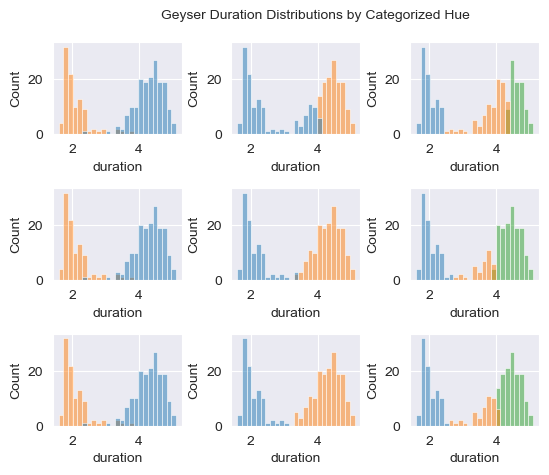

In [20]:
#plot the data using pyplot and seaborn
fig, ((h_dur,qc_dur2,qc_dur3),(h_dur2,c_2,c_3),(h_dur3,c_b2,c_b3))\
      = plt.subplots(3,3)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur,legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_2",ax=qc_dur2,legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="qcut_dur_3",ax=qc_dur3,legend=None)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur2,legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="cut_2",ax=c_2,legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="cut_3",ax=c_3,legend=None)

sns.histplot(data=geyser,x="duration",bins=25,hue="kind",ax=h_dur3,legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="cust_border_2",ax=c_b2, legend=None)
sns.histplot(data=geyser,x="duration",bins=25,hue="cust_border_3",ax=c_b3, legend=None)

#Add figure title
fig.suptitle("Geyser Duration Distributions by Categorized Hue", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()

NameError: name 'manual_color_map' is not defined

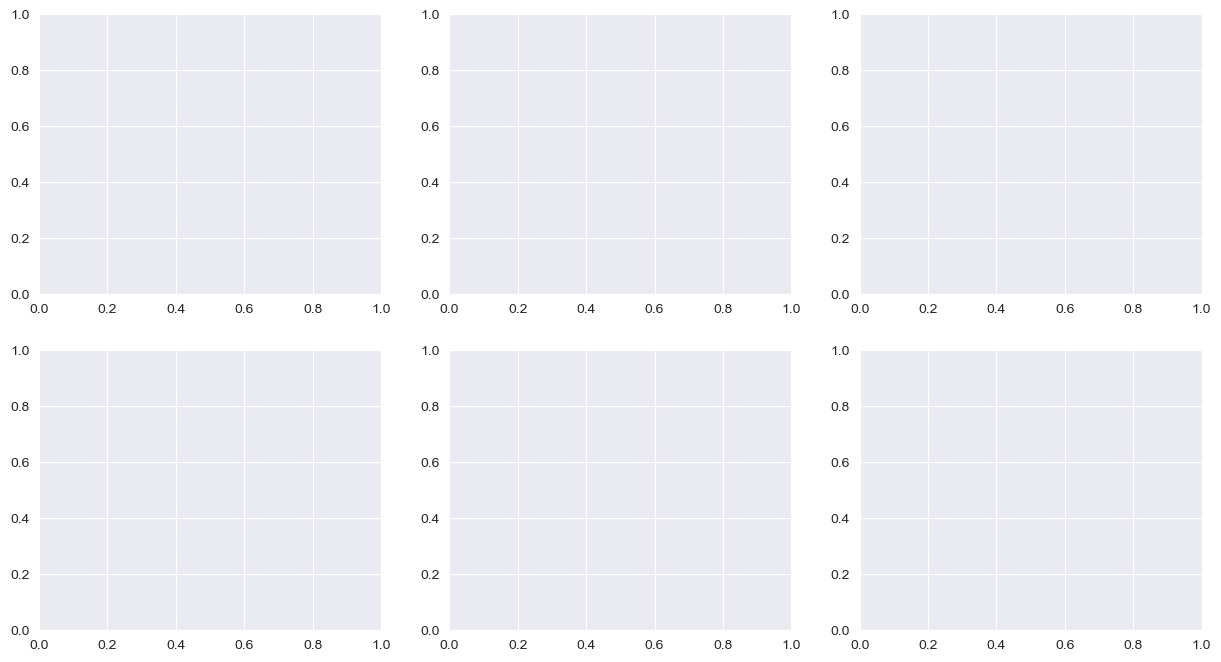

In [21]:
# Create subplots
fig, ((h_dur, qc_dur2, qc_dur3), (h_dur2, c_dur2, c_dur3)) = plt.subplots(2, 3, figsize=(15, 8))

# Mapping of axes to hue columns
plot_hues = {
    h_dur: "kind",
    qc_dur2: "qcut_dur_2",
    qc_dur3: "qcut_dur_3",
    h_dur2: "kind",
    c_dur2: "cut_2",
    c_dur3: "cut_2",
}

# Plot histograms manually for each category per hue column
for ax, hue_col in plot_hues.items():
    if hue_col not in geyser.columns:
        continue
    categories = geyser[hue_col].dropna().unique()
    for cat in categories:
        subset = geyser[geyser[hue_col] == cat]
        sns.histplot(
            data=subset,
            x="duration",
            bins=25,
            color=manual_color_map.get(cat, "gray"),
            label=cat,
            ax=ax,
            element="bars",
            stat="count",
            alpha=1.0,
            edgecolor=None
        )
    if ax.legend_:
        ax.legend_.remove()

# Create unified legend from manual color map
sorted_labels = sorted(manual_color_map.keys())  # ['long', 'medium', 'short']

legend_patches = [
    Patch(facecolor=manual_color_map[label], label=label.capitalize())
    for label in sorted_labels
]

# Add legend to figure
fig.legend(
    handles=legend_patches,
    title="Combined Legend",
    bbox_to_anchor=(0.9, 0.5),
    loc="center left",
    fontsize="large",
    title_fontsize="x-large",
    frameon=True
)
#Add figure title
fig.suptitle("Geyser Duration Distributions by Categorized Hue", fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define subplot titles
subplot_titles = [
    "Hue: kind", "Hue: qcut_dur_2", "Hue: qcut_dur_3",
    "Hue: kind (2)", "Hue: cut_2", "Hue: cut_2 (2)"
]

# Create 2×3 subplot grid
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=subplot_titles,
    horizontal_spacing=0.07,
    vertical_spacing=0.15
)

# Manual color map (hex)
manual_color_map = {
    'short': '#1f77b4',   # Blue
    'medium': '#2ca02c',  # Green
    'long': '#ff7f0e',    # Orange
}

# Mapping of subplot axes to hue columns
plot_hues = [
    "kind", "qcut_dur_2", "qcut_dur_3",
    "kind", "cut_2", "cut_2"
]

# Add traces manually for each subplot
for i, hue_col in enumerate(plot_hues):
    row = i // 3 + 1
    col = i % 3 + 1
    if hue_col not in geyser.columns:
        continue
    categories = geyser[hue_col].dropna().unique()
    for cat in categories:
        subset = geyser[geyser[hue_col] == cat]
        fig.add_trace(
            go.Histogram(
                x=subset["duration"],
                name=cat.capitalize(),
                marker_color=manual_color_map.get(cat, "gray"),
                showlegend=(i == 0),  # Show legend only once
                opacity=0.85
            ),
            row=row, col=col
        )

# Update layout
fig.update_layout(
    title_text="Geyser Duration Distributions by Categorized Hue",
    height=600,
    width=1100,
    bargap=0.1,
    legend_title_text="Category",
    legend=dict(
        x=1.02,
        y=0.5,
        xanchor="left",
        yanchor="middle"
    )
)

# Display interactive figure
fig.show()
